# Basic Template for test data generation

In [1]:
import numpy as np
from scipy.io import wavfile as wf
from scipy.signal import chirp
from subprocess import call
from os import remove
from random import randrange
import matplotlib.pyplot as plt

def createWav(outputFile, rate=4400):
    t = np.linspace(0, rate, rate)
    signal = chirp(t, 0, 1, 1)
    
    # wf.write(outputFile, rate, signal)
    plt.plot(t, signal)

def processFile(inputFile, plugin, outputFile):
    call(['mrswatson64.exe', '--plugin', plugin, '--input', 
          inputFile, '--output', outputFile ])

def randomOutput():
    rate = randrange(4400, 8000)
    name = "data %s" % rate
    createWav(name + ".wav" , rate=rate)
    processFile(name + ".wav", 
                "TSE_808_2.0_x64.dll", 
                name + " processed.wav")
    
createWav("test.wav")

# Generating audio that mimics a guitar's freq range

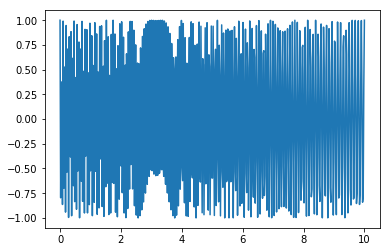

In [4]:
from IPython.display import Audio, display
import numpy as np
from scipy.signal import chirp
from scipy.io import wavfile as wf

def doGuitar():
    low = 80
    high = 1200
    sampleRate = 44000
    duration = sampleRate * 10

    signal = chirp(np.linspace(0, 10, duration), low, 10, high)
    display(Audio(signal, rate=sampleRate))
    
doGuitar()

# Generating Clicks and Pops

In [3]:
from IPython.display import Audio, display
import numpy as np
from scipy.signal import chirp
from scipy.io import wavfile as wf

def doClick():
    return None